<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [7]:
df.drop('loan_id',axis=1,inplace=True)

In [8]:
df.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


 self_employed
 education


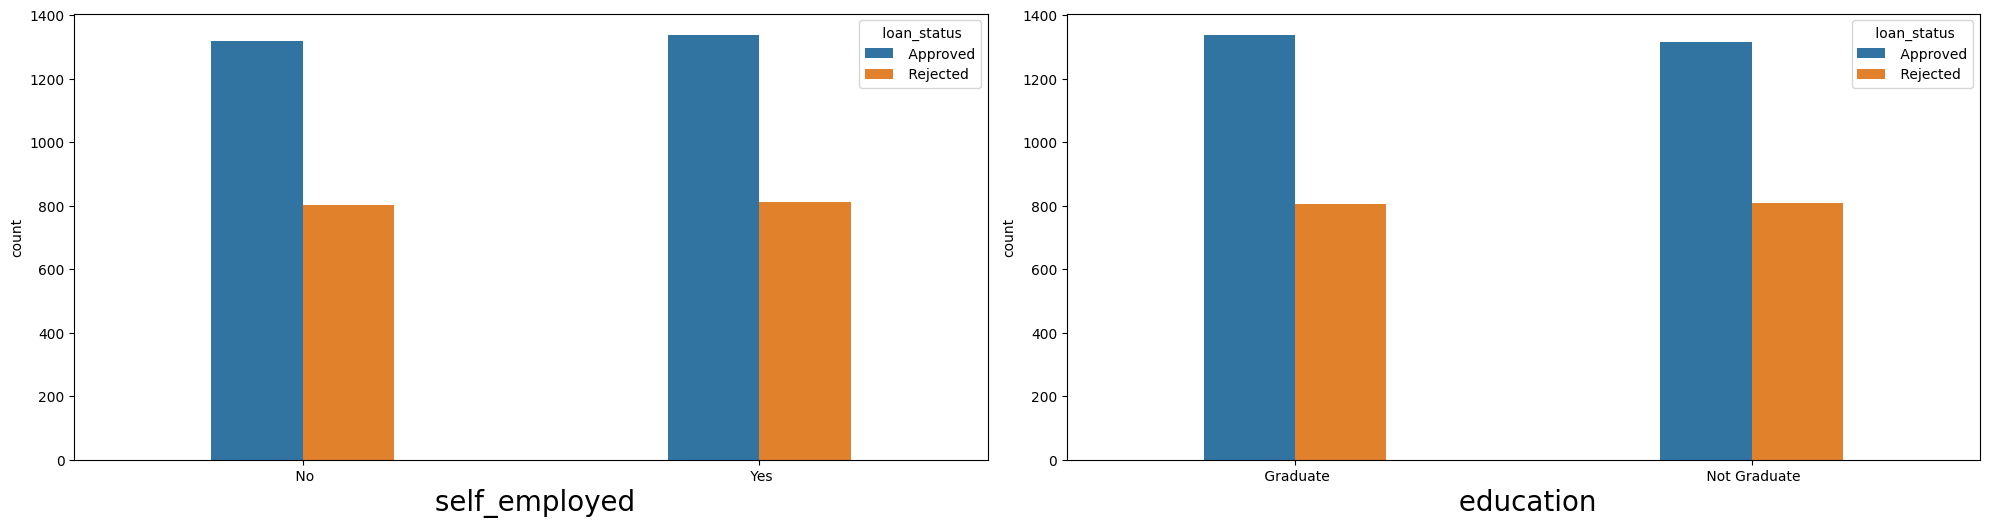

In [15]:
cat_col = [' self_employed',' education']

plotnum = 1
plt.figure(figsize = (20,10))
for i in cat_col:
    print(i)
    ax = plt.subplot(2,2,plotnum)
    sns.countplot(data=df, x=str(i), hue=df[' loan_status'], width=0.4)
    plt.xlabel(i, fontdict={'size':20})
    plotnum +=1
plt.tight_layout()



<Axes: xlabel=' loan_status', ylabel='count'>

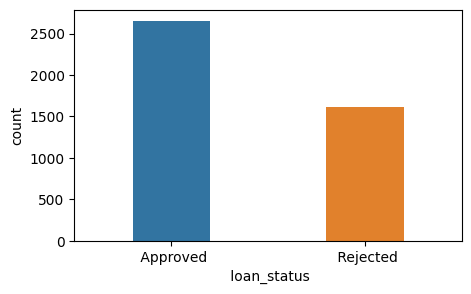

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(x=df[' loan_status'], width=0.4)

<ipython-input-19-90fbcb32b8bc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],norm_hist=True,color='orange')
<ipython-input-19-90fbcb32b8bc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],norm_hist=True,color='orange')
<ipython-input-19-90fbcb32b8bc>:6: UserWarning: 

`distplot`

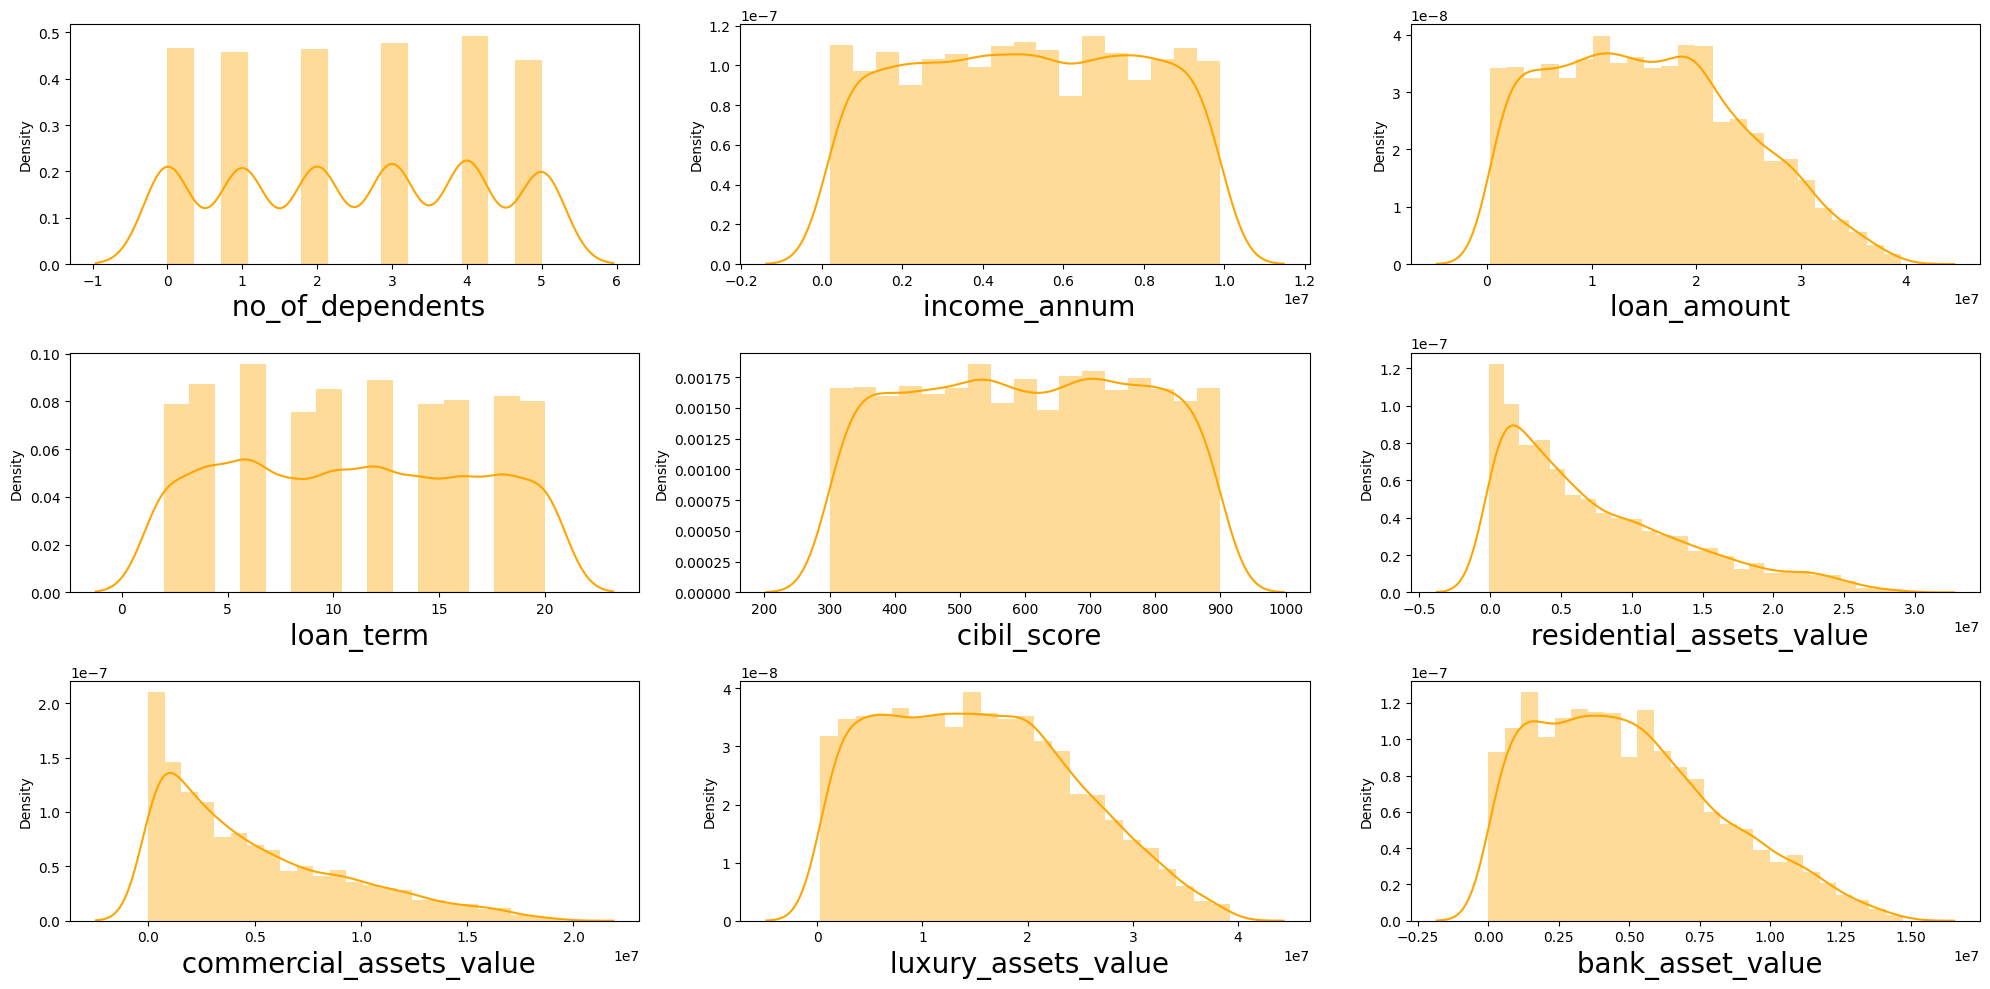

In [19]:
num_col=[x for x in df.columns if df[x].dtype!='object']
plotnum=1
plt.figure(figsize=(20,10))
for i in num_col:
  ax=plt.subplot(3,3,plotnum)
  sns.distplot(df[i],norm_hist=True,color='orange')
  plt.xlabel(i,fontdict={'size':20})
  plotnum+=1
plt.tight_layout()

<ipython-input-21-cd2a6bf53a2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop([' loan_term',' cibil_score'],axis=1).corr(),annot=True,cmap='crest')


<Axes: >

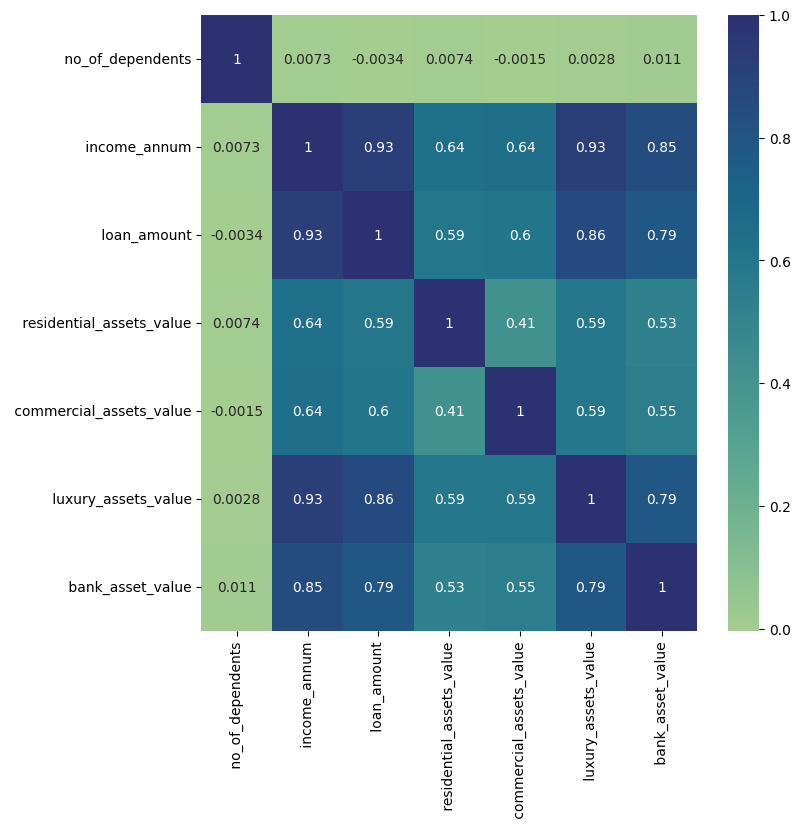

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.drop([' loan_term',' cibil_score'],axis=1).corr(),annot=True,cmap='crest')

<Axes: xlabel=' loan_amount', ylabel=' cibil_score'>

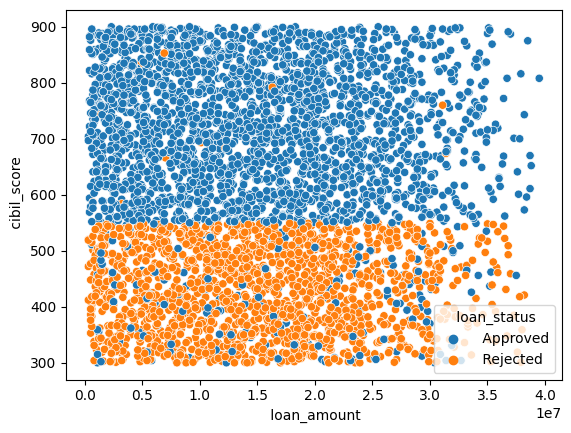

In [23]:
sns.scatterplot(x=df[' loan_amount'],y=df[' cibil_score'],hue=df[' loan_status'])

<Axes: xlabel=' cibil_score', ylabel=' income_annum'>

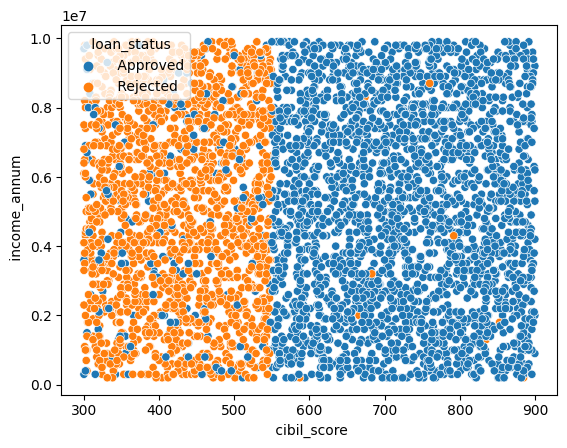

In [25]:
sns.scatterplot(y=df[' income_annum'],x=df[' cibil_score'],hue=df[' loan_status'])

In [26]:
cat_col=[' self_employed',' education',' loan_status']
for i in cat_col:
  print(df[i].value_counts())

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64
 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64
 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64


In [32]:
df[' loan_status'] = df[' loan_status'].replace([' Approved', ' Rejected'], [1,0])
df[' self_employed'] = df[' self_employed'].replace([' Yes', ' No'], [1,0])
df[' education'] = df[' education'].replace([' Graduate', ' Not Graduate'], [1,0])

In [39]:
X=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
y_smote.value_counts()

1    2127
0    2127
Name:  loan_status, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)
x_test = sc.fit_transform(x_test)

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
xgboost = XGBClassifier()
xgboost.fit(x_smote, y_smote)
pred = xgboost.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       325
           1       0.98      0.91      0.94       529

    accuracy                           0.93       854
   macro avg       0.92      0.94      0.93       854
weighted avg       0.93      0.93      0.93       854



In [49]:
pred=xgboost.predict(x_smote)
print(classification_report(y_smote,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254



In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
hyperparameter_grid={
    'regressor__n_estimators':[100,500,1000,1500,2000],
    'regressor__max_depth':[12,40,60,50,30],
    'regressor__learning_rate':[0.01,0.001,0.02,0.04,0.08]
}
random_cv=RandomizedSearchCV(estimator=xgboost,
                             param_distributions=hyperparameter_grid,
                             cv=3,
                             n_iter=10,
                             scoring='neg_root_mean_squared_error',
                             n_jobs=-1,
                             verbose=5,
                             return_train_score=True,
                             random_state=42)

In [52]:
random_cv.fit(x_smote,y_smote)
random_cv.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[13:57:28] WARNING: ../src/learner.cc:767: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators" } are not used.



{'regressor__n_estimators': 1500,
 'regressor__max_depth': 50,
 'regressor__learning_rate': 0.01}

In [55]:
xgboost2=XGBClassifier(regressor__n_estimators= 1500,
 regressor__max_depth=50,
 regressor__learning_rate= 0.01)
xgboost2.fit(x_smote,y_smote)
pred_test=xgboost2.predict(x_test)

[13:59:41] WARNING: ../src/learner.cc:767: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators" } are not used.



In [56]:
print('Classification report of test data after high parameter tunning')
print(classification_report(y_test,pred_test))

Classification report of test data after high parameter tunning
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       325
           1       0.98      0.91      0.94       529

    accuracy                           0.93       854
   macro avg       0.92      0.94      0.93       854
weighted avg       0.93      0.93      0.93       854



In [57]:
pred=xgboost2.predict(x_smote)
print('classification report of train data after high parameter tunning')
print(classification_report(y_smote,pred))

classification report of train data after high parameter tunning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254



In [58]:
print('confusion matrix of test data:',confusion_matrix(y_test,pred_test),end='\n\n')
print('Accuracy on test data:',accuracy_score(y_test,pred_test))

confusion matrix of test data: [[314  11]
 [ 50 479]]

Accuracy on test data: 0.9285714285714286
